In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

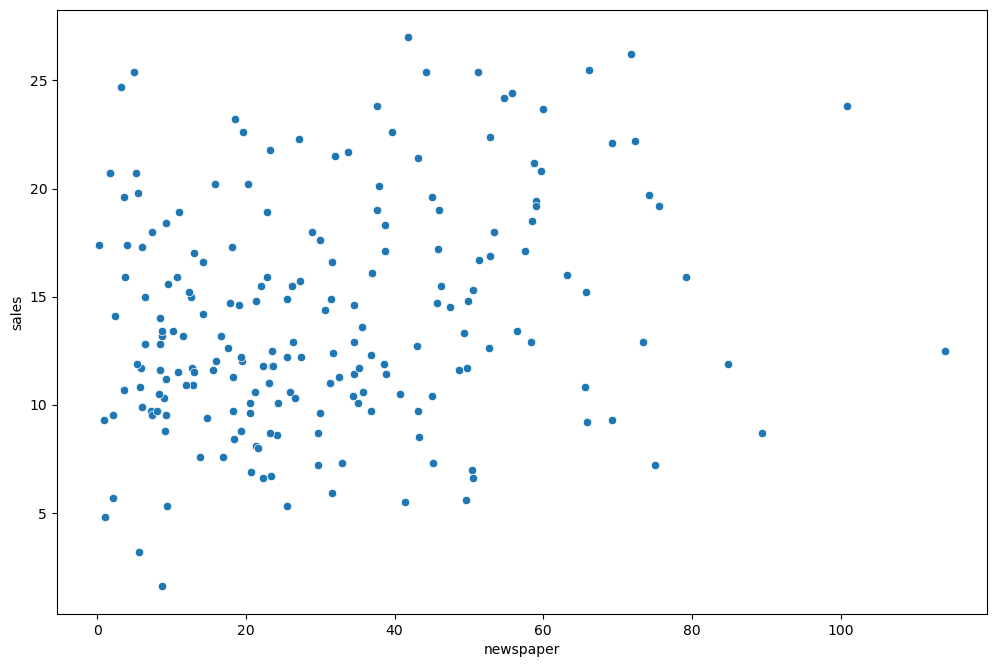

In [18]:
fig = plt.figure(figsize =(12,8),dpi=100)
sns.scatterplot(data = df,x='newspaper',y='sales')

<AxesSubplot:xlabel='TV', ylabel='sales'>

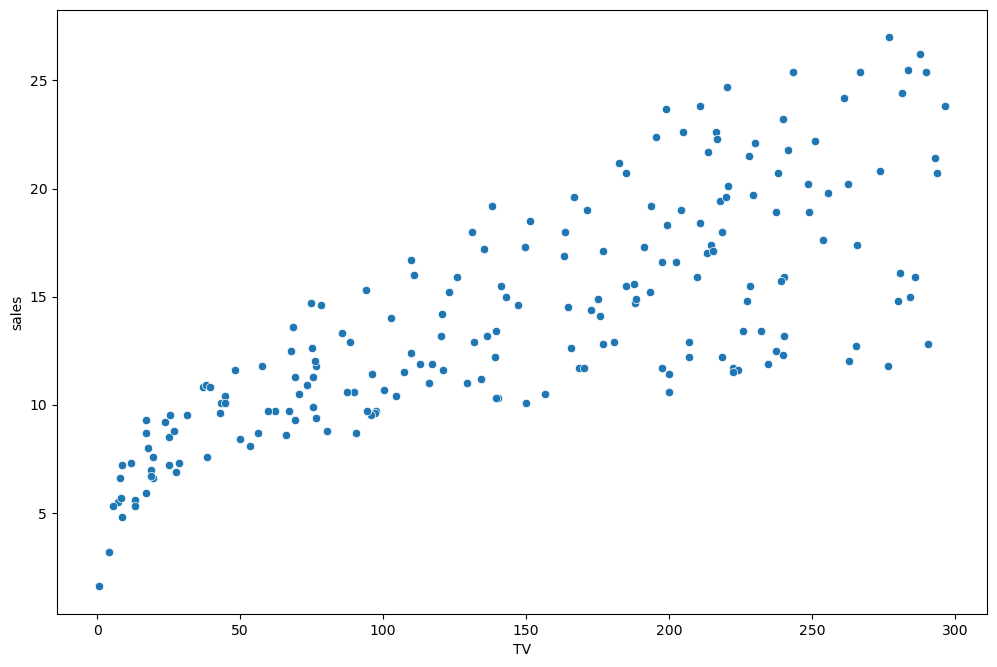

In [17]:
fig = plt.figure(figsize =(12,8),dpi=100)
sns.scatterplot(data = df,x='TV',y='sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

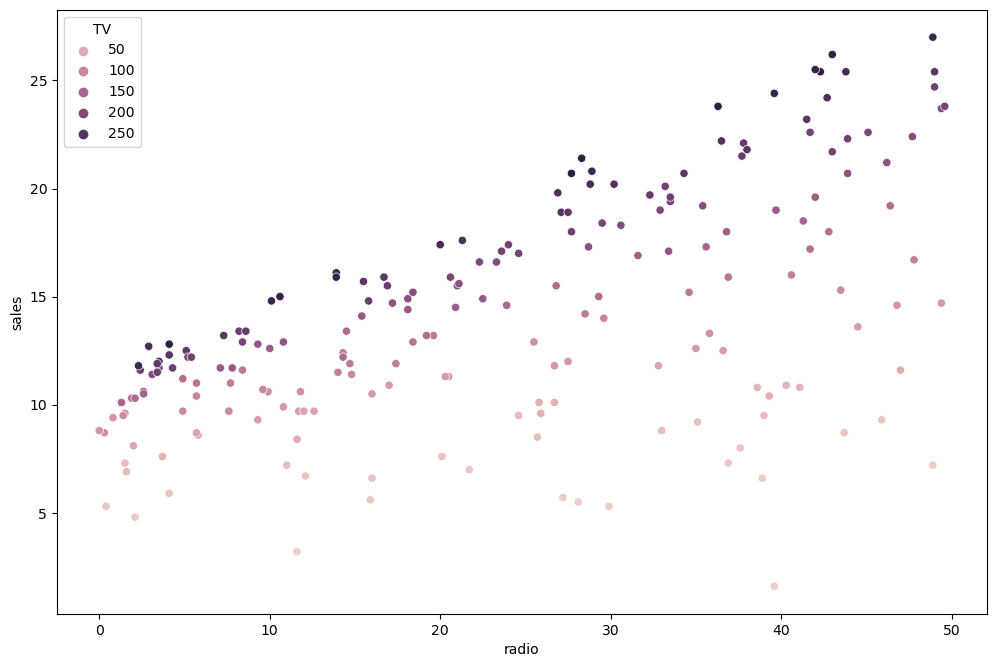

In [27]:
fig = plt.figure(figsize =(12,8),dpi=100)
sns.scatterplot(data = df,x='radio',hue='TV',y='sales')

<AxesSubplot:xlabel='TV', ylabel='sales'>

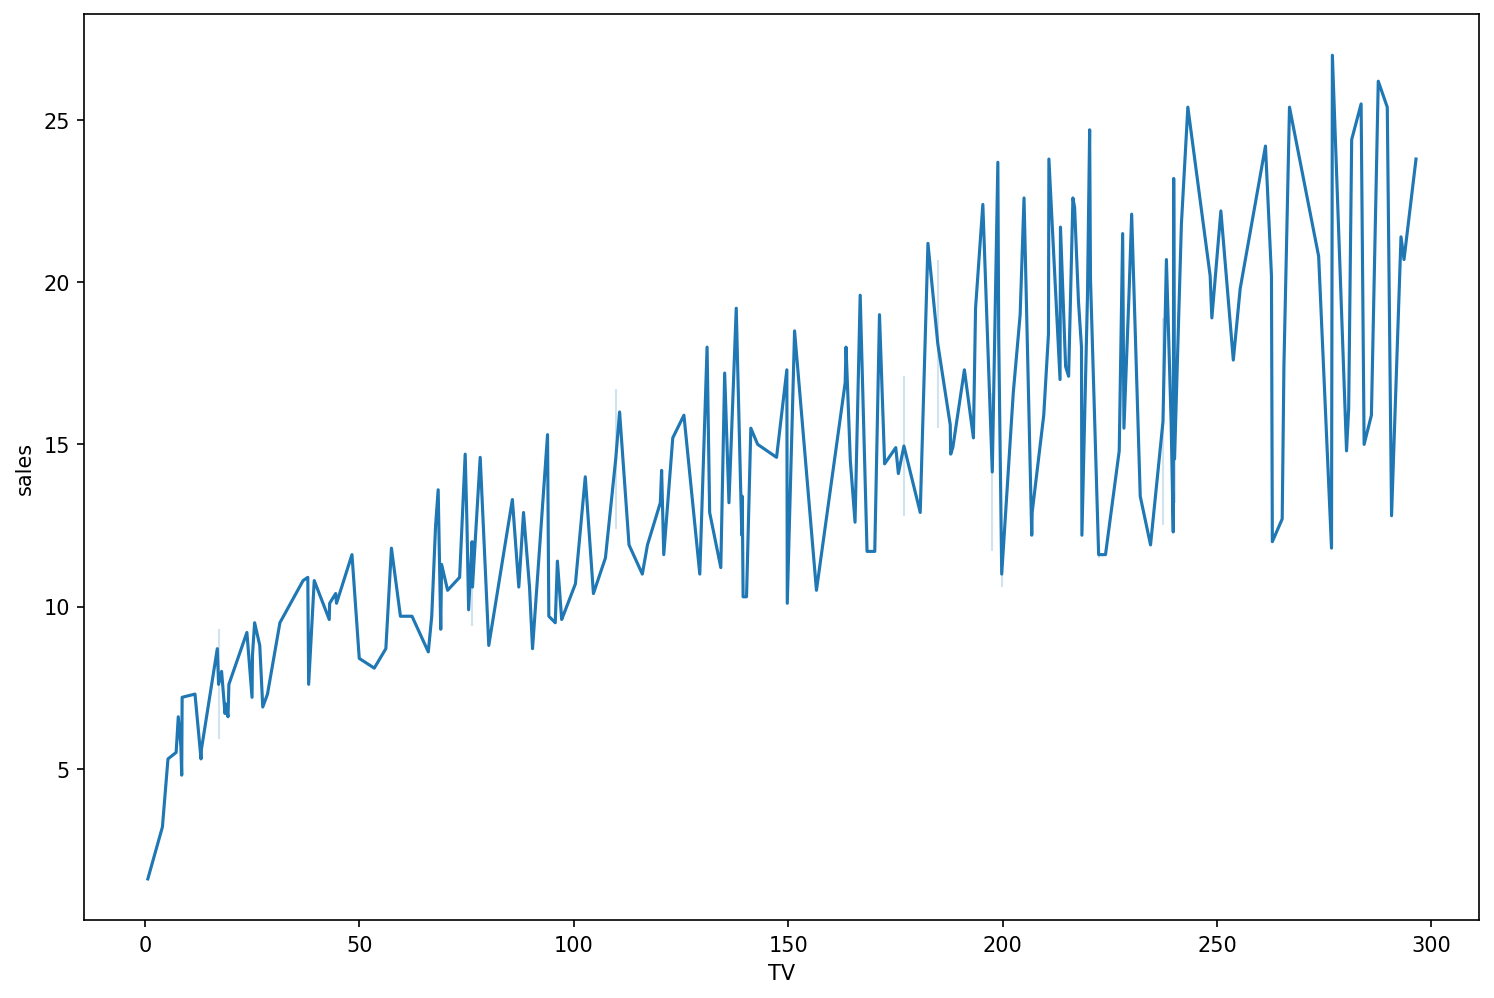

In [31]:
fig = plt.figure(figsize=(12,8),dpi=150)
sns.lineplot(data = df,x='TV',y='sales')

In [25]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:xlabel='radio', ylabel='sales'>

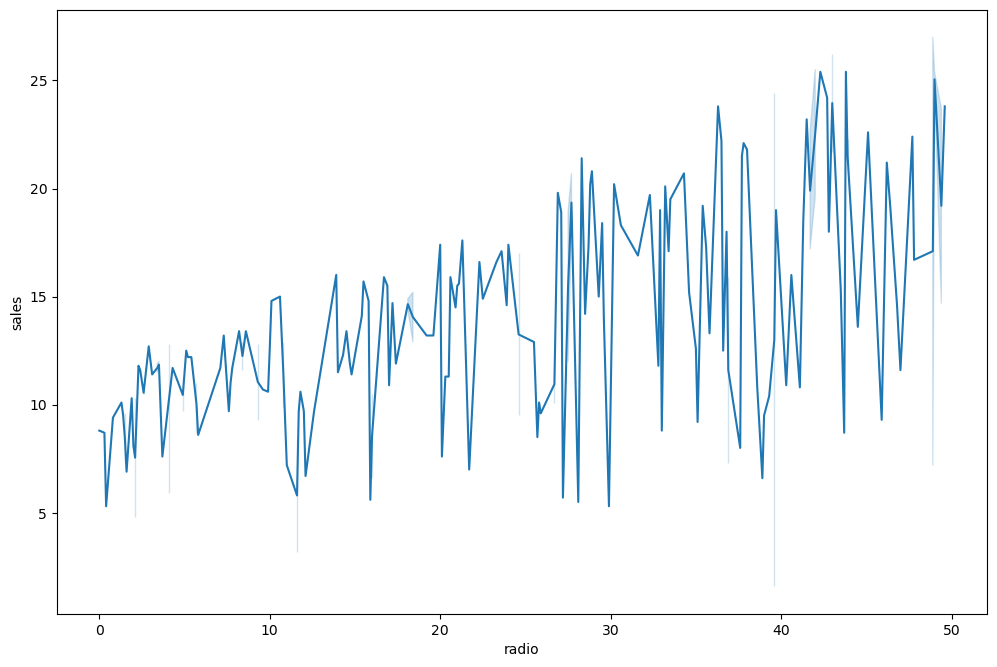

In [38]:
fig = plt.figure(figsize=(12,8),dpi=100)
sns.lineplot(
    data=df,
    x="radio", y="sales",
    markers=True, dashes=False
)

<Figure size 2400x1600 with 0 Axes>

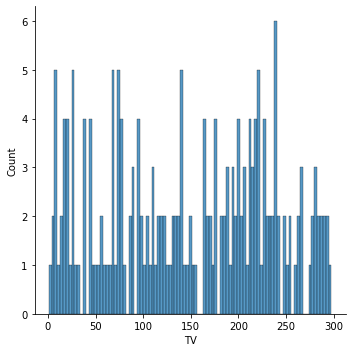

In [44]:
fig = plt.figure(figsize=(12,8),dpi=200)
sns.displot(df,x='TV',binwidth=3)

<Figure size 2400x1600 with 0 Axes>

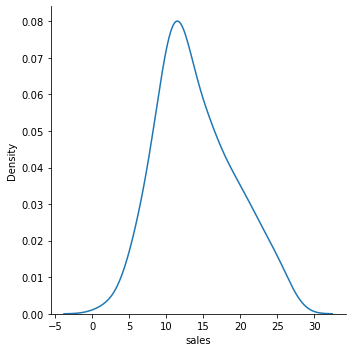

In [46]:
fig = plt.figure(figsize=(12,8),dpi=200)
sns.displot(df,x='sales',kind='kde')

<AxesSubplot:xlabel='TV', ylabel='sales'>

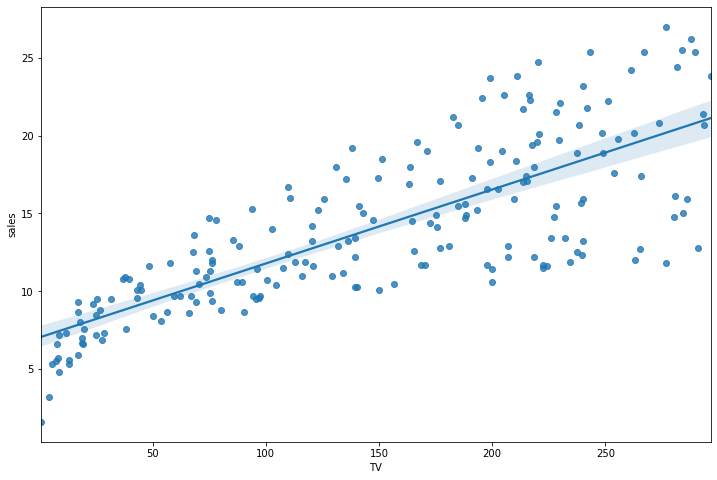

In [48]:
fig = plt.figure(figsize =(12,8))
sns.regplot(x="TV", y="sales", data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

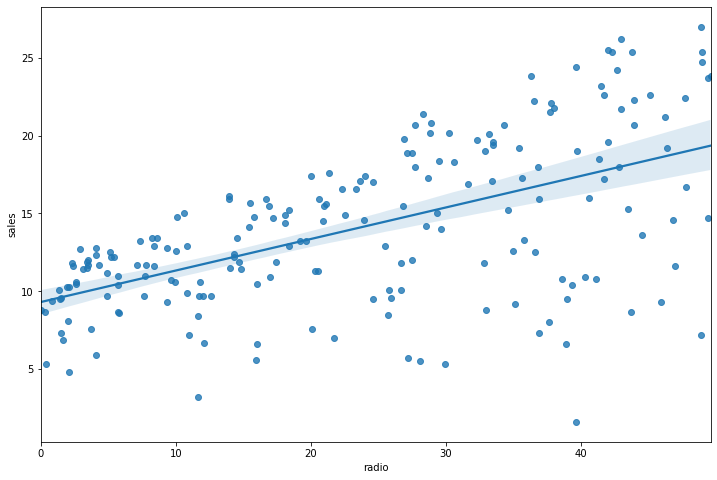

In [49]:
fig = plt.figure(figsize =(12,8))
sns.regplot(x="radio", y="sales", data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

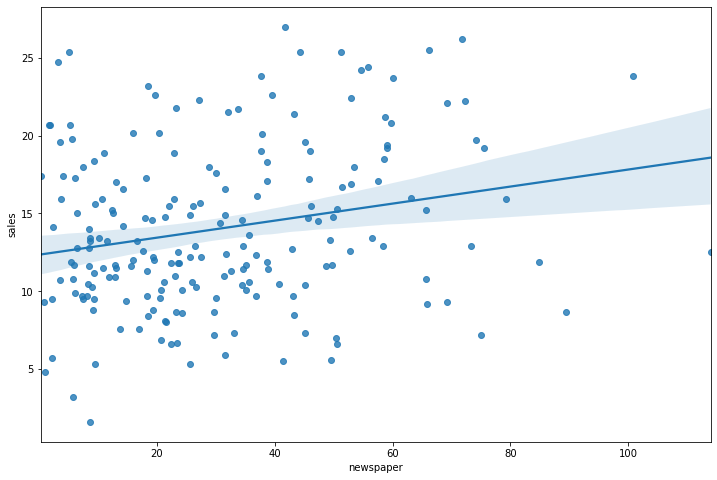

In [50]:
fig = plt.figure(figsize =(12,8))
sns.regplot(x="newspaper", y="sales", data=df)

<Figure size 864x576 with 0 Axes>

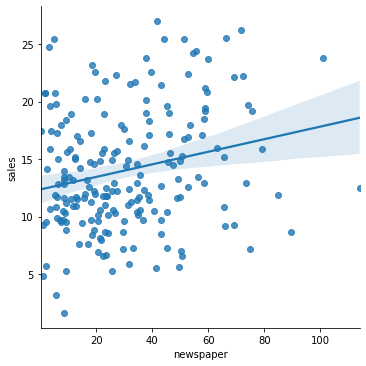

In [53]:
fig = plt.figure(figsize =(12,8))
sns.lmplot(x="newspaper", y="sales", data=df)

In [67]:
df['radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

In [68]:
IQR = 36.525000 -9.975000

In [69]:
IQR


26.549999999999997

In [75]:
lower_bound = 9.975000 - (1.5*IQR)
upper_bound = 36.525000 + (1.5*IQR)


In [73]:
lower_bound

-29.849999999999994

In [76]:
upper_bound

76.35

In [77]:
df['radio'].head()

0    37.8
1    39.3
2    45.9
3    41.3
4    10.8
Name: radio, dtype: float64

In [78]:
#Linear Regression Portion

In [91]:
X = df['TV']
y= df['sales']

In [83]:
np.polyfit(X,y,deg=1)

array([0.04753664, 7.03259355])

In [84]:
potential_spend = np.linspace(0,500,100)

In [85]:
predicted_sales = 0.04753664*potential_spend + 7.03259355

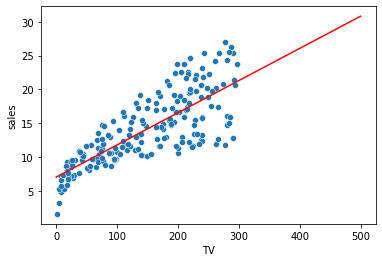

In [95]:
sns.scatterplot(x='TV',y='sales',data = df)
plt.plot(potential_spend,predicted_sales,color ='red')

In [97]:
spend = 200
predicted_sales = 0.04753664*spend + 7.03259355

In [98]:
predicted_sales

16.53992155

In [102]:
X= df.drop('sales',axis=1)

In [103]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [104]:
y = df['sales']

In [105]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [108]:
X_train

,TV,radio,newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [109]:
y_train

154    15.6
114    14.6
118    15.9
64     18.0
165    11.9
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 134, dtype: float64

In [110]:
from sklearn.linear_model import LinearRegression

In [112]:
model = LinearRegression()

In [113]:
model.fit(X_train,y_train)

LinearRegression()

In [115]:
test_predictions =model.predict(X_test)

In [116]:
test_predictions

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [117]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [118]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

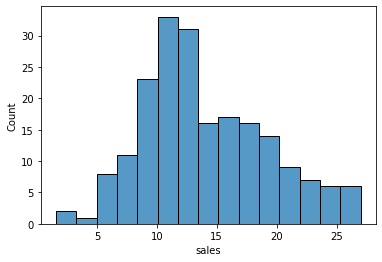

In [121]:
sns.histplot(data=df,x='sales',bins = 15)

In [122]:
mean_absolute_error(y_test,test_predictions)

1.236918849425931

In [123]:
mean_squared_error(y_test,test_predictions)

2.348375242713826

In [124]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5324409426512415

In [125]:
#Mean squared error is more like the variance for your predictions, however it is not in the same y units, when we use the square root in root mean squared error, it becomes representative of the standard deviation

In [126]:
test_residuals = y_test - test_predictions

In [127]:
test_residuals

37    -0.943438
109    0.219217
31     0.472822
89    -0.204943
66     0.323548
         ...   
183    2.282263
127    2.018084
53     1.354705
100   -2.168582
93     1.123234
Name: sales, Length: 66, dtype: float64

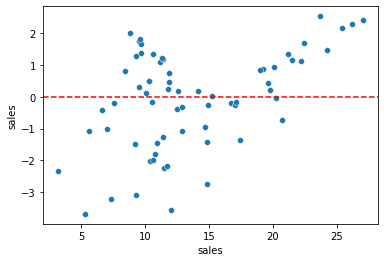

In [129]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color ='red',ls='--')

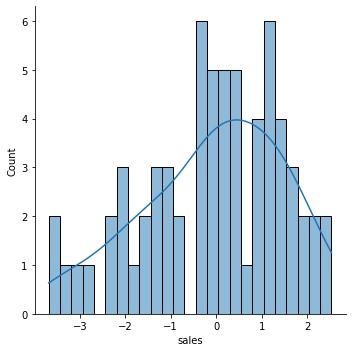

In [130]:
sns.displot(test_residuals,bins=25,kde= True)